# Analise de Crédito

**Objetivo:** Analisar a inadimplência por região, finalidade, situação de moradia e prazo

### Bibliotecas e configurações iniciais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import arquivos

#### Configurando o tema dos gráficos

In [2]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (10,6)

#### Lendo arquivos

In [3]:
df = pd.read_csv(arquivos/'credito_pessoal_10000.csv', 
                 parse_dates=['data_solicitacao']) # parse dates força o python a tentar importar como data

### Explorando os dados

In [4]:
# Visualizando o dataframe

df.head()

,id_solicitacao,data_solicitacao,idade,renda_mensal,anos_emprego,score_credito,valor_emprestimo,taxa_juros_anual,prazo_meses,finalidade,regiao,situacao_moradia,divida_existente,contas_abertas,atrasos_12m,aprovado,inadimplente
0,1,2024-05-10,27.0,11645.86,4,588.0,26966.78,13.72,48,Reforma,Sudeste,Hipotecada,50192.76,7,0,1,0
1,2,2024-11-10,18.0,25687.18,3,770.0,58867.10,18.06,36,Reforma,Sudeste,Hipotecada,39109.31,6,1,1,0
2,3,2022-05-02,40.0,40118.55,3,772.0,7672.21,16.75,60,Reforma,Sul,Própria,30470.34,3,0,1,0
3,4,2023-04-12,20.0,20571.84,14,569.0,17997.48,11.91,36,Saúde,Sudeste,Própria,26734.80,8,1,0,0
4,5,2022-11-27,28.0,5620.76,13,NaN,34631.17,10.07,48,Consolidação de dívidas,Sudeste,Alugada,6644.98,5,1,1,0


In [5]:
# Dimensão do dataframe

df.shape

(10200, 17)

In [6]:
# Tipos de dados do dataframe

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_solicitacao    10200 non-null  int64         
 1   data_solicitacao  10200 non-null  datetime64[us]
 2   idade             9387 non-null   float64       
 3   renda_mensal      9386 non-null   float64       
 4   anos_emprego      10200 non-null  int64         
 5   score_credito     9694 non-null   float64       
 6   valor_emprestimo  10200 non-null  float64       
 7   taxa_juros_anual  10200 non-null  float64       
 8   prazo_meses       10200 non-null  int64         
 9   finalidade        10200 non-null  str           
 10  regiao            10200 non-null  str           
 11  situacao_moradia  10200 non-null  str           
 12  divida_existente  10200 non-null  float64       
 13  contas_abertas    10200 non-null  int64         
 14  atrasos_12m       10200 non-null 

##### Analise dos Nulos

Analise dos % de nulos para avaliar a gravidade dos valores nulos

In [7]:
# Validando valores nulos

df.isna().sum()

id_solicitacao        0
data_solicitacao      0
idade               813
renda_mensal        814
anos_emprego          0
score_credito       506
valor_emprestimo      0
taxa_juros_anual      0
prazo_meses           0
finalidade            0
regiao                0
situacao_moradia      0
divida_existente      0
contas_abertas        0
atrasos_12m           0
aprovado              0
inadimplente          0
dtype: int64

In [8]:
# Salvando em váriáveis para criar o dataframe

nulos = df.isna().sum().sort_values(ascending=False)
pct_nulos = (df.isna().mean() * 100).sort_values(ascending=False)

In [9]:
pd.concat([nulos.rename('nulos'), pct_nulos.rename('% nulos')], axis=1)

,nulos,% nulos
renda_mensal,814,7.980392
idade,813,7.970588
score_credito,506,4.960784
id_solicitacao,0,0.000000
data_solicitacao,0,0.000000
anos_emprego,0,0.000000
valor_emprestimo,0,0.000000
taxa_juros_anual,0,0.000000
prazo_meses,0,0.000000
finalidade,0,0.000000


#### Analise de variáveis

Análise das variáveis mais importantes para o projeto: região, finalidade, situação de moradia e prazo

In [10]:
# Analise da variável finalidade 

df.groupby('finalidade').size()

finalidade
Automóvel                  1476
Cartao de credito            50
Cartão de crédito          1480
Consolidação de dívidas    1464
Educação                   1462
Reforma                    1396
Saúde                      1446
Viagem                     1426
dtype: int64

In [11]:
# Analise da variável regiao 

df.groupby('regiao').size()

regiao
Centro-Oeste     961
Nordeste        1578
Norte            488
Sudeste         5050
Sul             2123
dtype: int64

In [12]:
# Analise da variável situacao_moradia

df.groupby('situacao_moradia').size()

situacao_moradia
Alugada       4044
Hipotecada    2096
Outros         498
Própria       3562
dtype: int64

In [13]:
# Analise da variável prazo

df.groupby('prazo_meses').size()

prazo_meses
24    1593
36    4026
48    3036
60    1545
dtype: int64

### Limpeza de Dados

1. **Remover duplicatas exatas**
1. **Corrigir categorias com erro de digitação** (ex: Cartão de crédito == Cartao de credito)
1. **Tratar datas no futuro** (substituir pela data mais próxima válida)
1. **Tratar valores negativos** (ex: renda negativa) - Transformar valores em nan
1. **Imputar nulos** (estratégias simples)
1. **Detectar e tratar outliers** (IQR ou Winsorização)
1. **Criar variáveis derivadas** (Ex: ano, mes, relacao_divida_renda)

In [14]:
# 1 - Removendo duplicatas

antes = df.shape
df = df.drop_duplicates()
depois = df.shape

print(f'Antes: {antes}. Depois: {depois}')

Antes: (10200, 17). Depois: (10000, 17)


In [15]:
# 2 - Corrigindo as categorias com erro de digitação

df['finalidade'] = df['finalidade'].replace({'Cartao de credito':'Cartão de crédito'})

In [16]:
# Validando a correção

df.groupby('finalidade').size()

finalidade
Automóvel                  1453
Cartão de crédito          1500
Consolidação de dívidas    1438
Educação                   1437
Reforma                    1368
Saúde                      1408
Viagem                     1396
dtype: int64

In [17]:
# 3 - Tratando datas futuras

# Criando variável com data de hoje para validação

hoje = pd.Timestamp.today().normalize()
hoje

Timestamp('2026-02-08 00:00:00')

In [18]:
# Total de registros com data futura

futuro = df['data_solicitacao'] > hoje
print(f'Total registros com data futura: {futuro.sum()}')

Total registros com data futura: 25


In [19]:
# Substituindo os registros com data futura

df.loc[futuro, 'data_solicitacao'] = hoje

In [20]:
# Validando mudanças

futuro = df['data_solicitacao'] > hoje
print(f'Total registros com data futura: {futuro.sum()}')

Total registros com data futura: 0


In [21]:
# 4 - Tratando valores impossíveis

for col in ['renda_mensal', 'divida_existente']:
    neg_count = (df[col] < 0).sum()
    print(f'Negativos detectados em {col}: {neg_count}')
    df.loc[df[col] < 0, col] = np.nan

Negativos detectados em renda_mensal: 20
Negativos detectados em divida_existente: 18


### Analise Gráfica

Análise de colunas numéricas

In [22]:
colunas = ['idade', 'renda_mensal', 'valor_emprestimo', 'taxa_juros_anual', 'divida_existente', 'contas_abertas', 'atrasos_12m', 'score_credito']

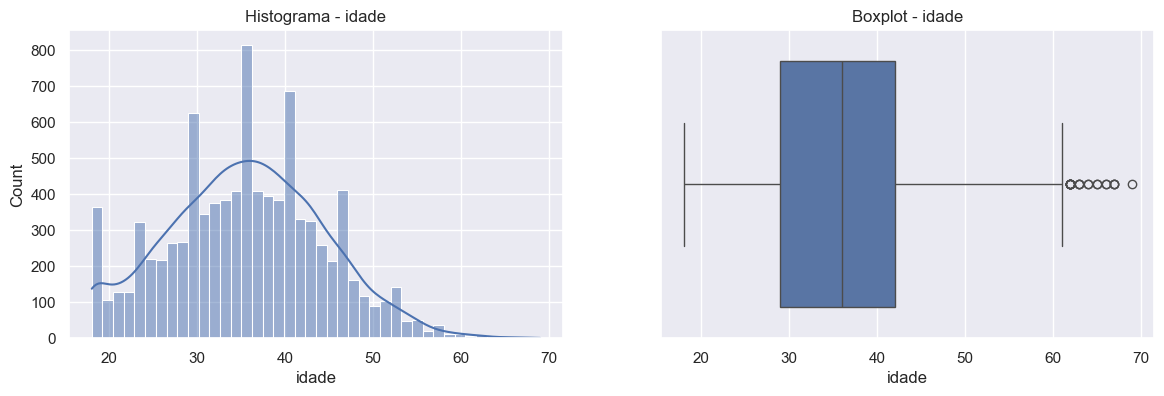

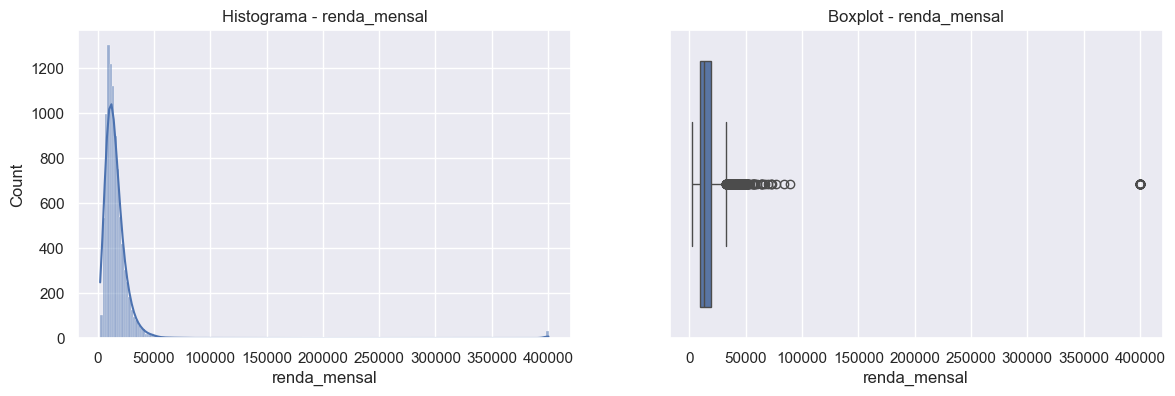

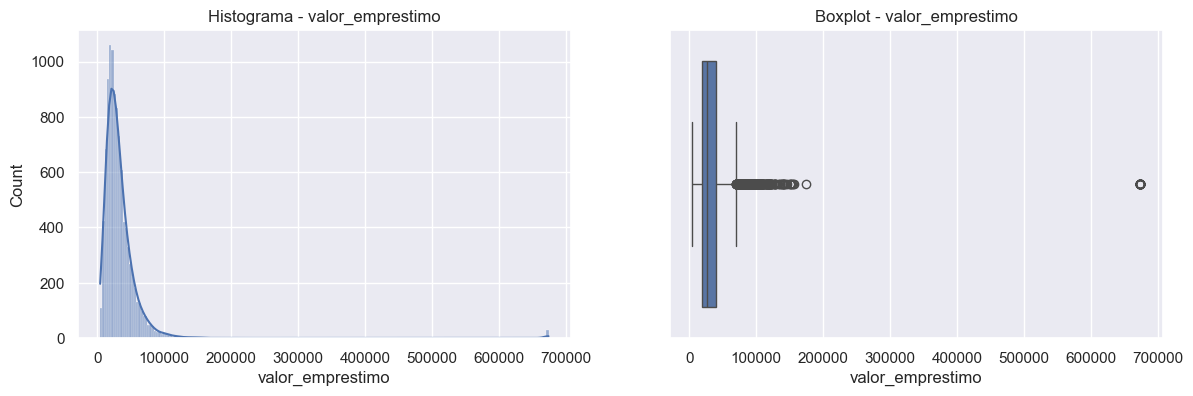

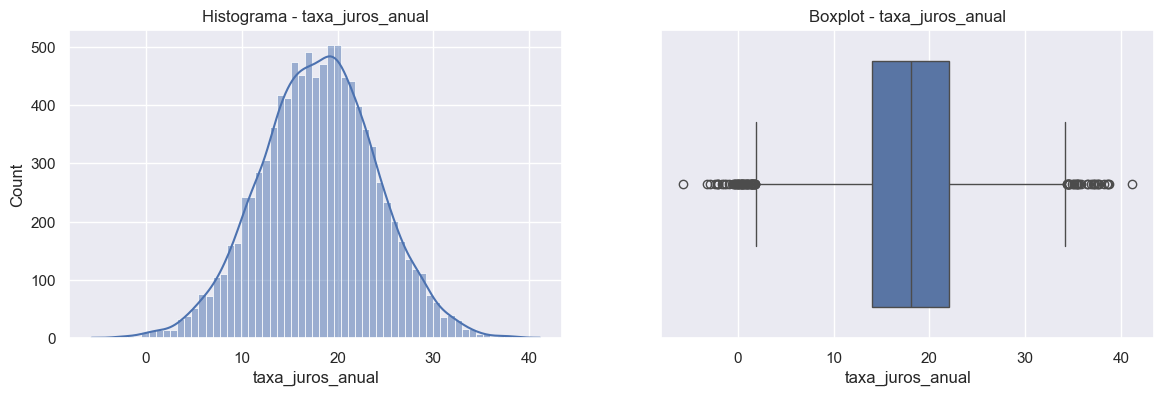

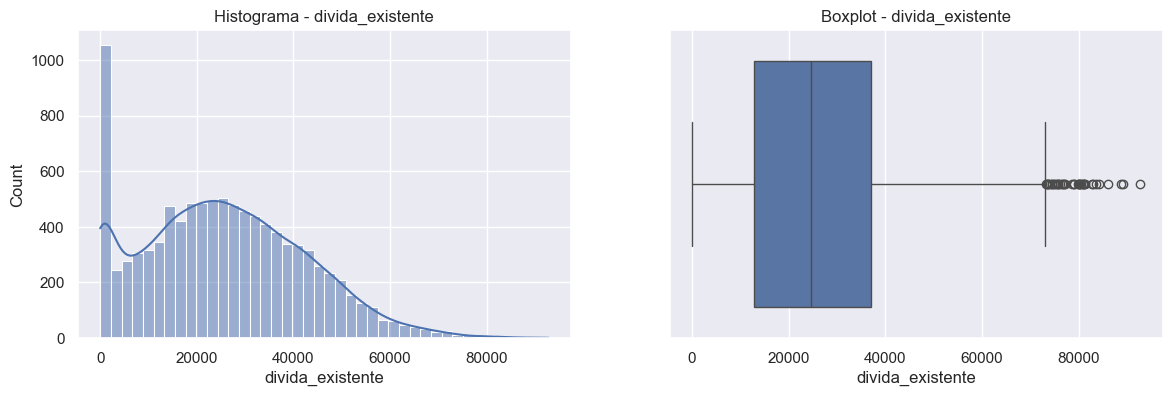

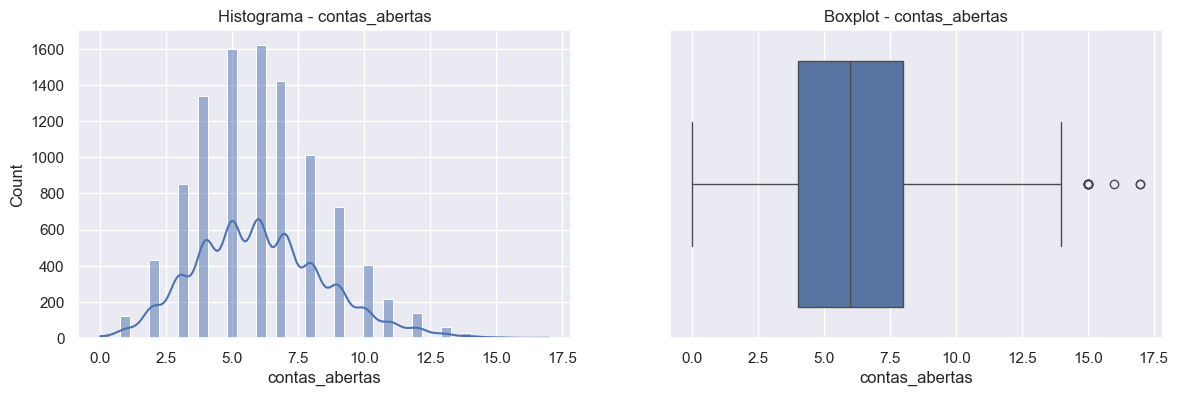

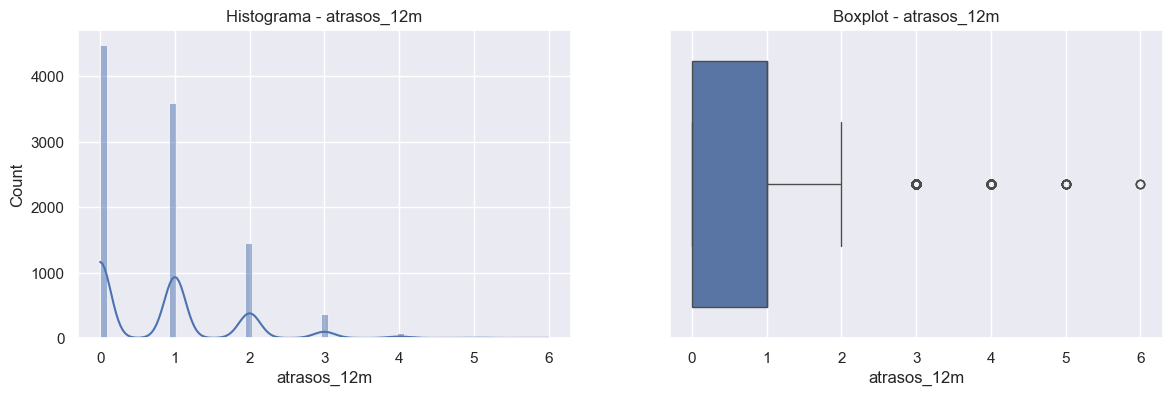

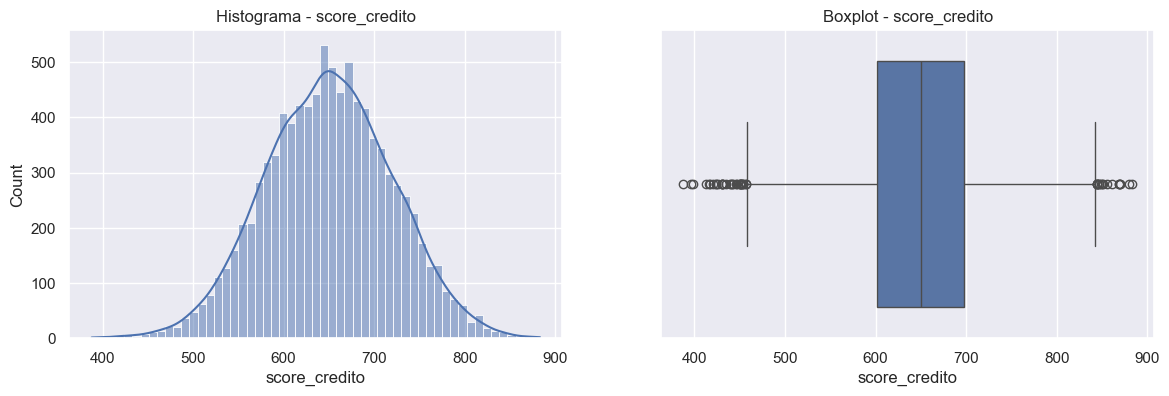

In [23]:
for col in colunas:
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(data=df, x=col, kde=True, ax=ax[0])
    ax[0].set_title(f'Histograma - {col}')
    sns.boxplot(data=df, x=col, ax=ax[1])
    ax[1].set_title(f'Boxplot - {col}')
    plt.show()